In [1]:
!pip install be-great

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from be_great import GReaT
import pandas as pd

In [3]:
# Importing training data
data = pd.read_csv("stroke_train.csv")

In [4]:
len(data)

3927

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3927 non-null   int64  
 1   gender             3927 non-null   object 
 2   age                3927 non-null   float64
 3   hypertension       3927 non-null   int64  
 4   heart_disease      3927 non-null   int64  
 5   ever_married       3927 non-null   object 
 6   work_type          3927 non-null   object 
 7   Residence_type     3927 non-null   object 
 8   avg_glucose_level  3927 non-null   float64
 9   bmi                3927 non-null   float64
 10  smoking_status     3927 non-null   object 
 11  stroke             3927 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 368.3+ KB


In [6]:
model = GReaT(llm='distilgpt2', batch_size=20, epochs=50, save_steps=4000)
model.fit(data)
synthetic_data = model.sample(n_samples=len(data), max_length=2000)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.856600
1000,0.712900
1500,0.697000
2000,0.688900
2500,0.684000
3000,0.679900
3500,0.675900
4000,0.672900
4500,0.669900
5000,0.666400


  0%|          | 0/3927 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
3949it [00:43, 90.27it/s]


In [7]:
synthetic_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,64520.0,Male,53.0,0.0,0.0,Yes,Private,Rural,97.99,32.2,Unknown,0.0
1,57159.0,Female,34.0,0.0,0.0,No,Private,Urban,91.33,24.8,never smoked,0.0
2,65946.0,Male,52.0,0.0,0.0,Yes,Govt_job,Urban,56.02,29.7,Unknown,0.0
3,66856.0,Female,32.0,0.0,0.0,Yes,Private,Rural,73.93,23.7,Unknown,0.0
4,39042.0,Female,5.0,0.0,0.0,No,children,Urban,88.85,17.2,Unknown,0.0


### Assessing duplicates

In [8]:
def assess_duplicates(real,fake):
# Find duplicates within the 'real' dataset
    duplicates_in_real = real[real.duplicated(keep=False)]  # keep=False marks all duplicates

    # Find duplicates within the 'synthetic' dataset
    duplicates_in_synthetic = fake[fake.duplicated(keep='first')]  # keep=False marks all duplicates

    # Print the number of duplicate rows in each DataFrame
    print("Number of duplicate rows in 'real' dataset:", len(duplicates_in_real))
    print("Number of duplicate rows in 'synthetic' dataset:", len(duplicates_in_synthetic))


    # Find common duplicates between the two datasets
    common_duplicates = pd.merge(real, fake, how='inner').drop_duplicates()

    # Print the number of common duplicate rows between 'real' and 'synthetic'
    print("Number of common duplicate rows between 'real' and 'synthetic':", len(common_duplicates))

In [9]:
assess_duplicates(data,synthetic_data)

Number of duplicate rows in 'real' dataset: 0
Number of duplicate rows in 'synthetic' dataset: 0
Number of common duplicate rows between 'real' and 'synthetic': 0


### Using Synthetic Data Vault to assess the quality of data

In [10]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


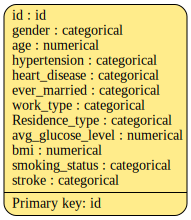

In [11]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [14]:
X_test = pd.read_csv("stroke_test.csv")

In [15]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

diagnostic = run_diagnostic(
    real_data=X_test,
    synthetic_data=synthetic_data,
    metadata=metadata
)
quality_report = evaluate_quality(
    X_test,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 12/12 [00:00<00:00, 407.75it/s]|
Data Validity Score: 97.1%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 145.94it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 98.55%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:00<00:00, 195.18it/s]|
Column Shapes Score: 91.85%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:01<00:00, 40.40it/s]|
Column Pair Trends Score: 41.49%

Overall Score (Average): 66.67%



In [16]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,gender,TVComplement,0.935172
1,age,KSComplement,0.912209
2,hypertension,TVComplement,0.948329
3,heart_disease,TVComplement,0.961053
4,ever_married,TVComplement,0.960110
5,work_type,TVComplement,0.864129
6,Residence_type,TVComplement,0.988927
7,avg_glucose_level,KSComplement,0.748246
8,bmi,KSComplement,0.911188
9,smoking_status,TVComplement,0.891682


In [17]:
synthetic_data.to_csv('synthetic_data_stroke_3_GReaT.csv',encoding='utf-8',index= False)

### Calculate Range Coverage and KSComplement for Numerical Variables

In [18]:
from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['bmi','avg_glucose_level']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for bmi is: 0.5738831615120275
KSComplement for bmi is: 0.9111879893597876
Range coverage for avg_glucose_level is: 0.8651357583172556
KSComplement for avg_glucose_level is: 0.7482456044813779


### Calculate Category Coverage and TVComplement for Categorical Variables

In [19]:

from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['work_type','smoking_status']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=synthetic_data[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for work_type is: 1.0
TVComplement for work_type is: 0.8641290621043826
Category coverage for smoking_status is: 1.0
TVComplement for smoking_status is: 0.8916820570109176


### Wassersterin Distances for Testing vs Synthetic and Testing vs Training

In [20]:
from scipy.stats import wasserstein_distance
wasserstein_distances = {}
for column in X_test.columns[8:10]:
    wasserstein_dist = wasserstein_distance(X_test[column], synthetic_data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'For Testing data vs Synthetic Data {column}: {distance}')

For Testing data vs Synthetic Data avg_glucose_level: 19.966657209449227
For Testing data vs Synthetic Data bmi: 1.449313774760042


In [21]:
wasserstein_distances = {}
for column in X_test.columns[8:10]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'For Testing data vs Training Data {column}: {distance}')

For Testing data vs Training Data avg_glucose_level: 0.9210892240621485
For Testing data vs Training Data bmi: 0.4357661227794204


### KL Divergence for Testing vs Synthetic and Testing vs Training

In [22]:

from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[8:10]:
    kl_divergence = entropy(X_test[column], synthetic_data[column][:len(X_test)])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Testing data vs Synthetic Data {column}: {divergence}')

For Testing data vs Synthetic Data avg_glucose_level: 0.09385191574222873
For Testing data vs Synthetic Data bmi: 0.06355634851320077


In [23]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[8:10]:
    kl_divergence = entropy(X_test[column], data[column][:len(X_test)])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Testing data vs Training Data {column}: {divergence}')

For Testing data vs Training Data avg_glucose_level: 0.14953756572088872
For Testing data vs Training Data bmi: 0.07350233765670086


In [24]:
# Check for MSE and r2
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test['bmi'], data[:len(X_test)]['bmi'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test['bmi'], synthetic_data[:len(X_test)]['bmi'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test['bmi'], data[:len(X_test)]['bmi'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test['bmi'], synthetic_data[:len(X_test)]['bmi'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 128.20159877800407
MSE between Testing Data and Synthetic Data: 108.73206720977598
R-squared Score (between Testing Data and Real Data): -0.8731813259365859
R-squared Score (between Testing Data and Synthetic Data): -0.5887077834381835


### Using Table Evaluator to evaluate the data

In [26]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install table_evaluator
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


(982, 12) (3927, 12)


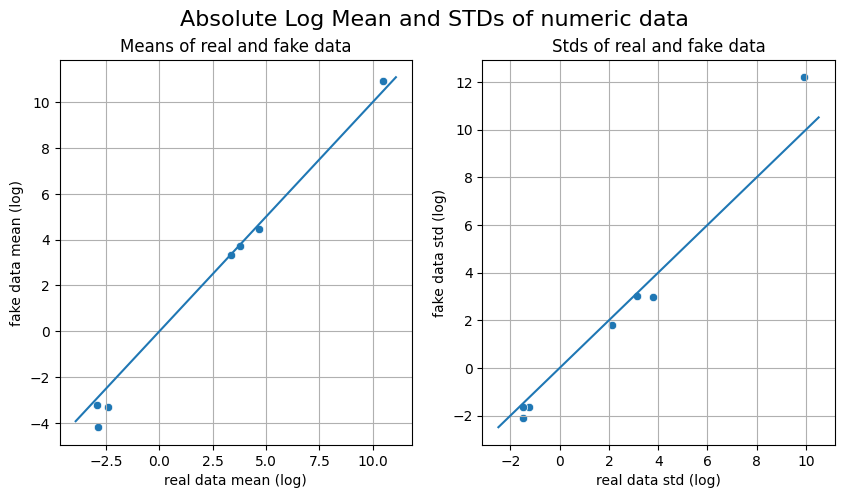

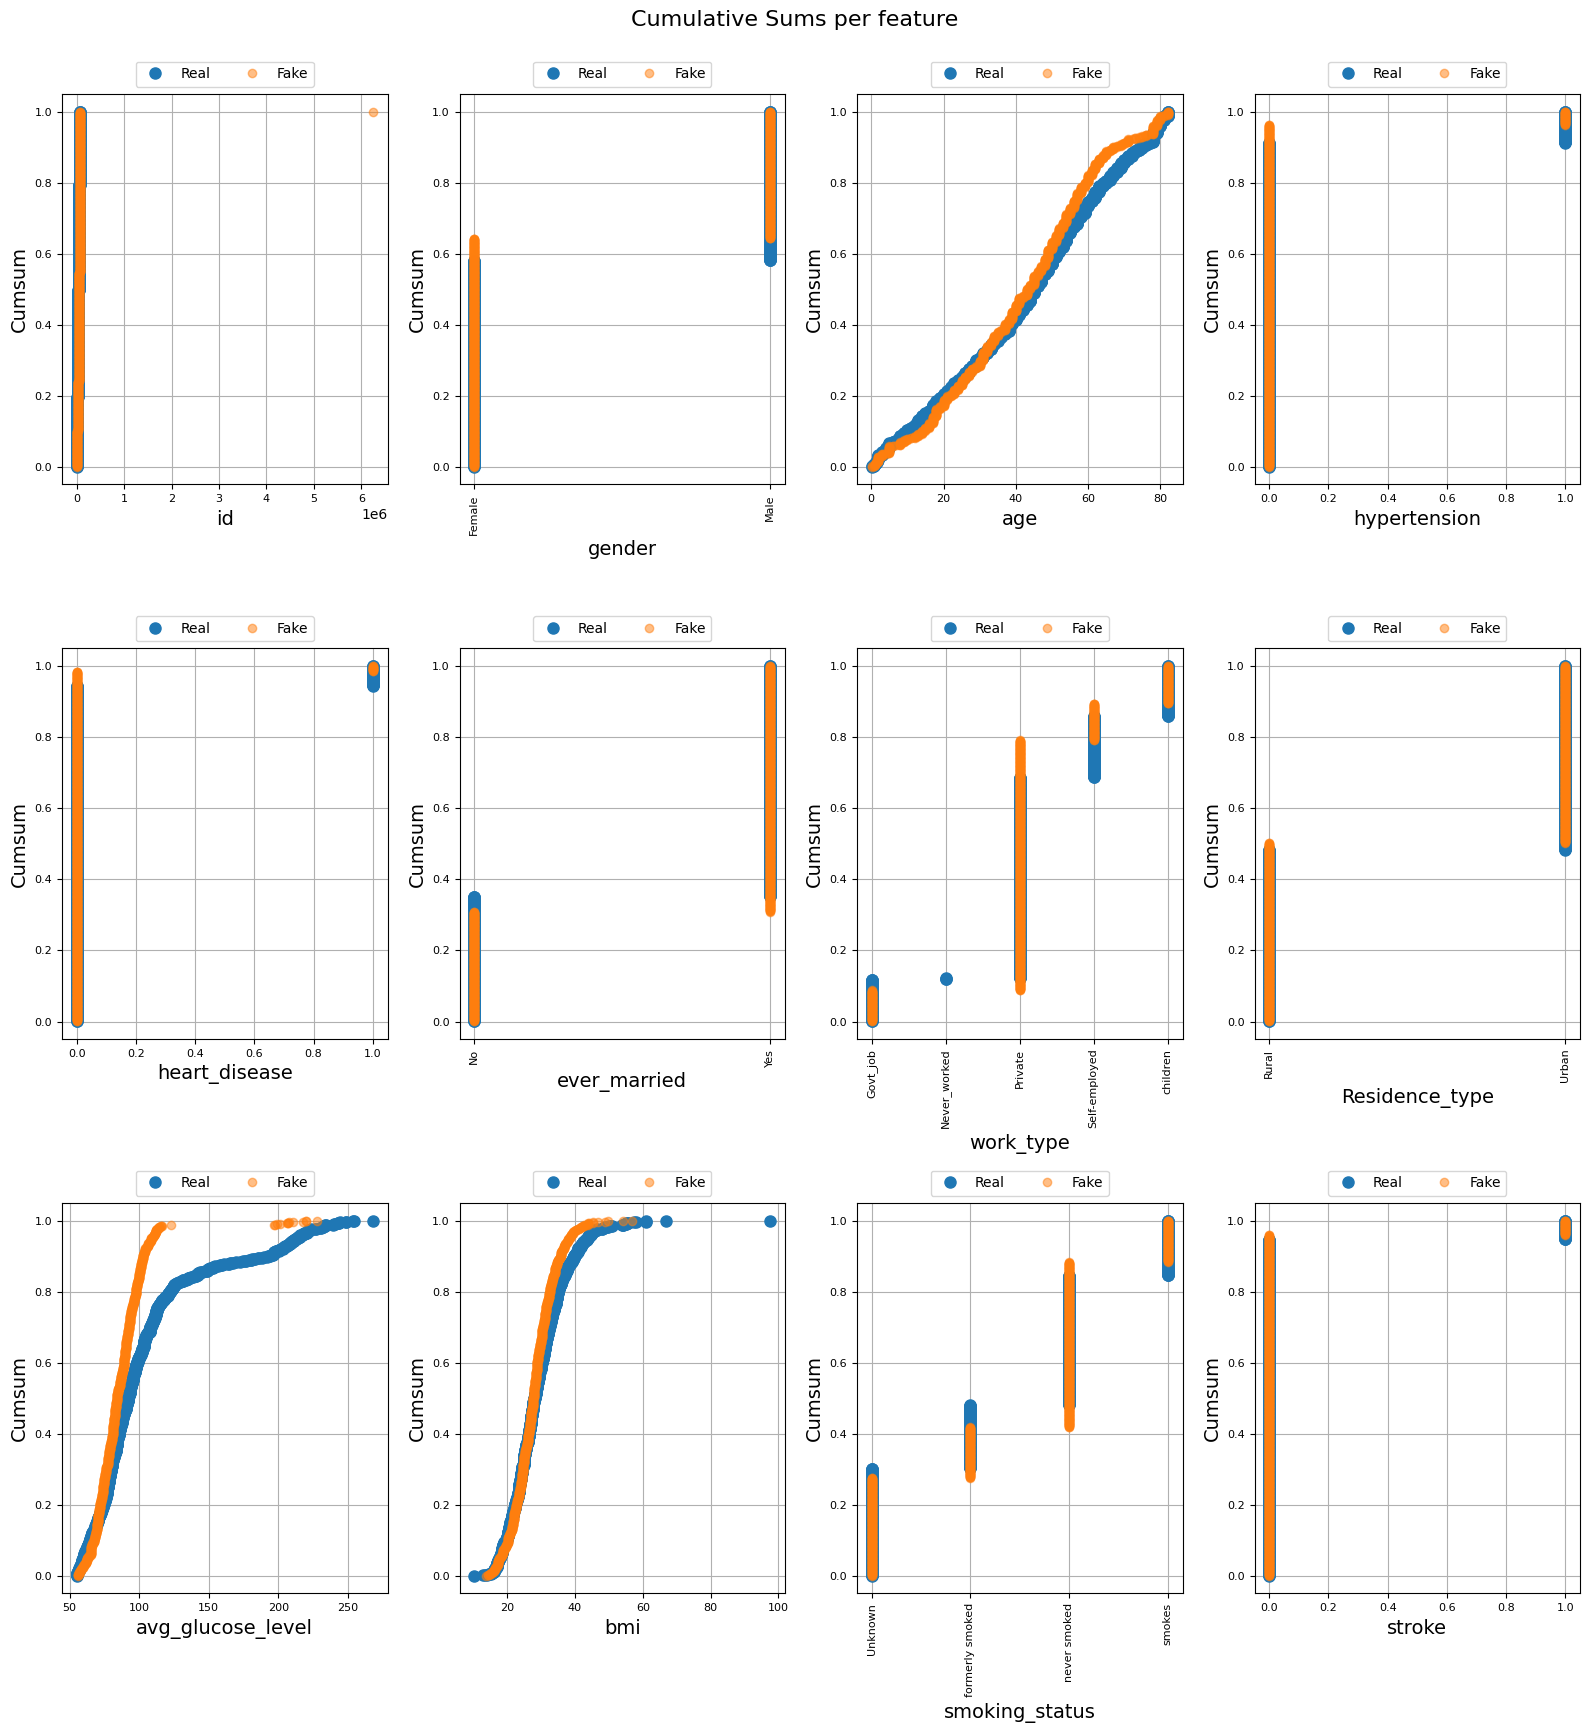

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

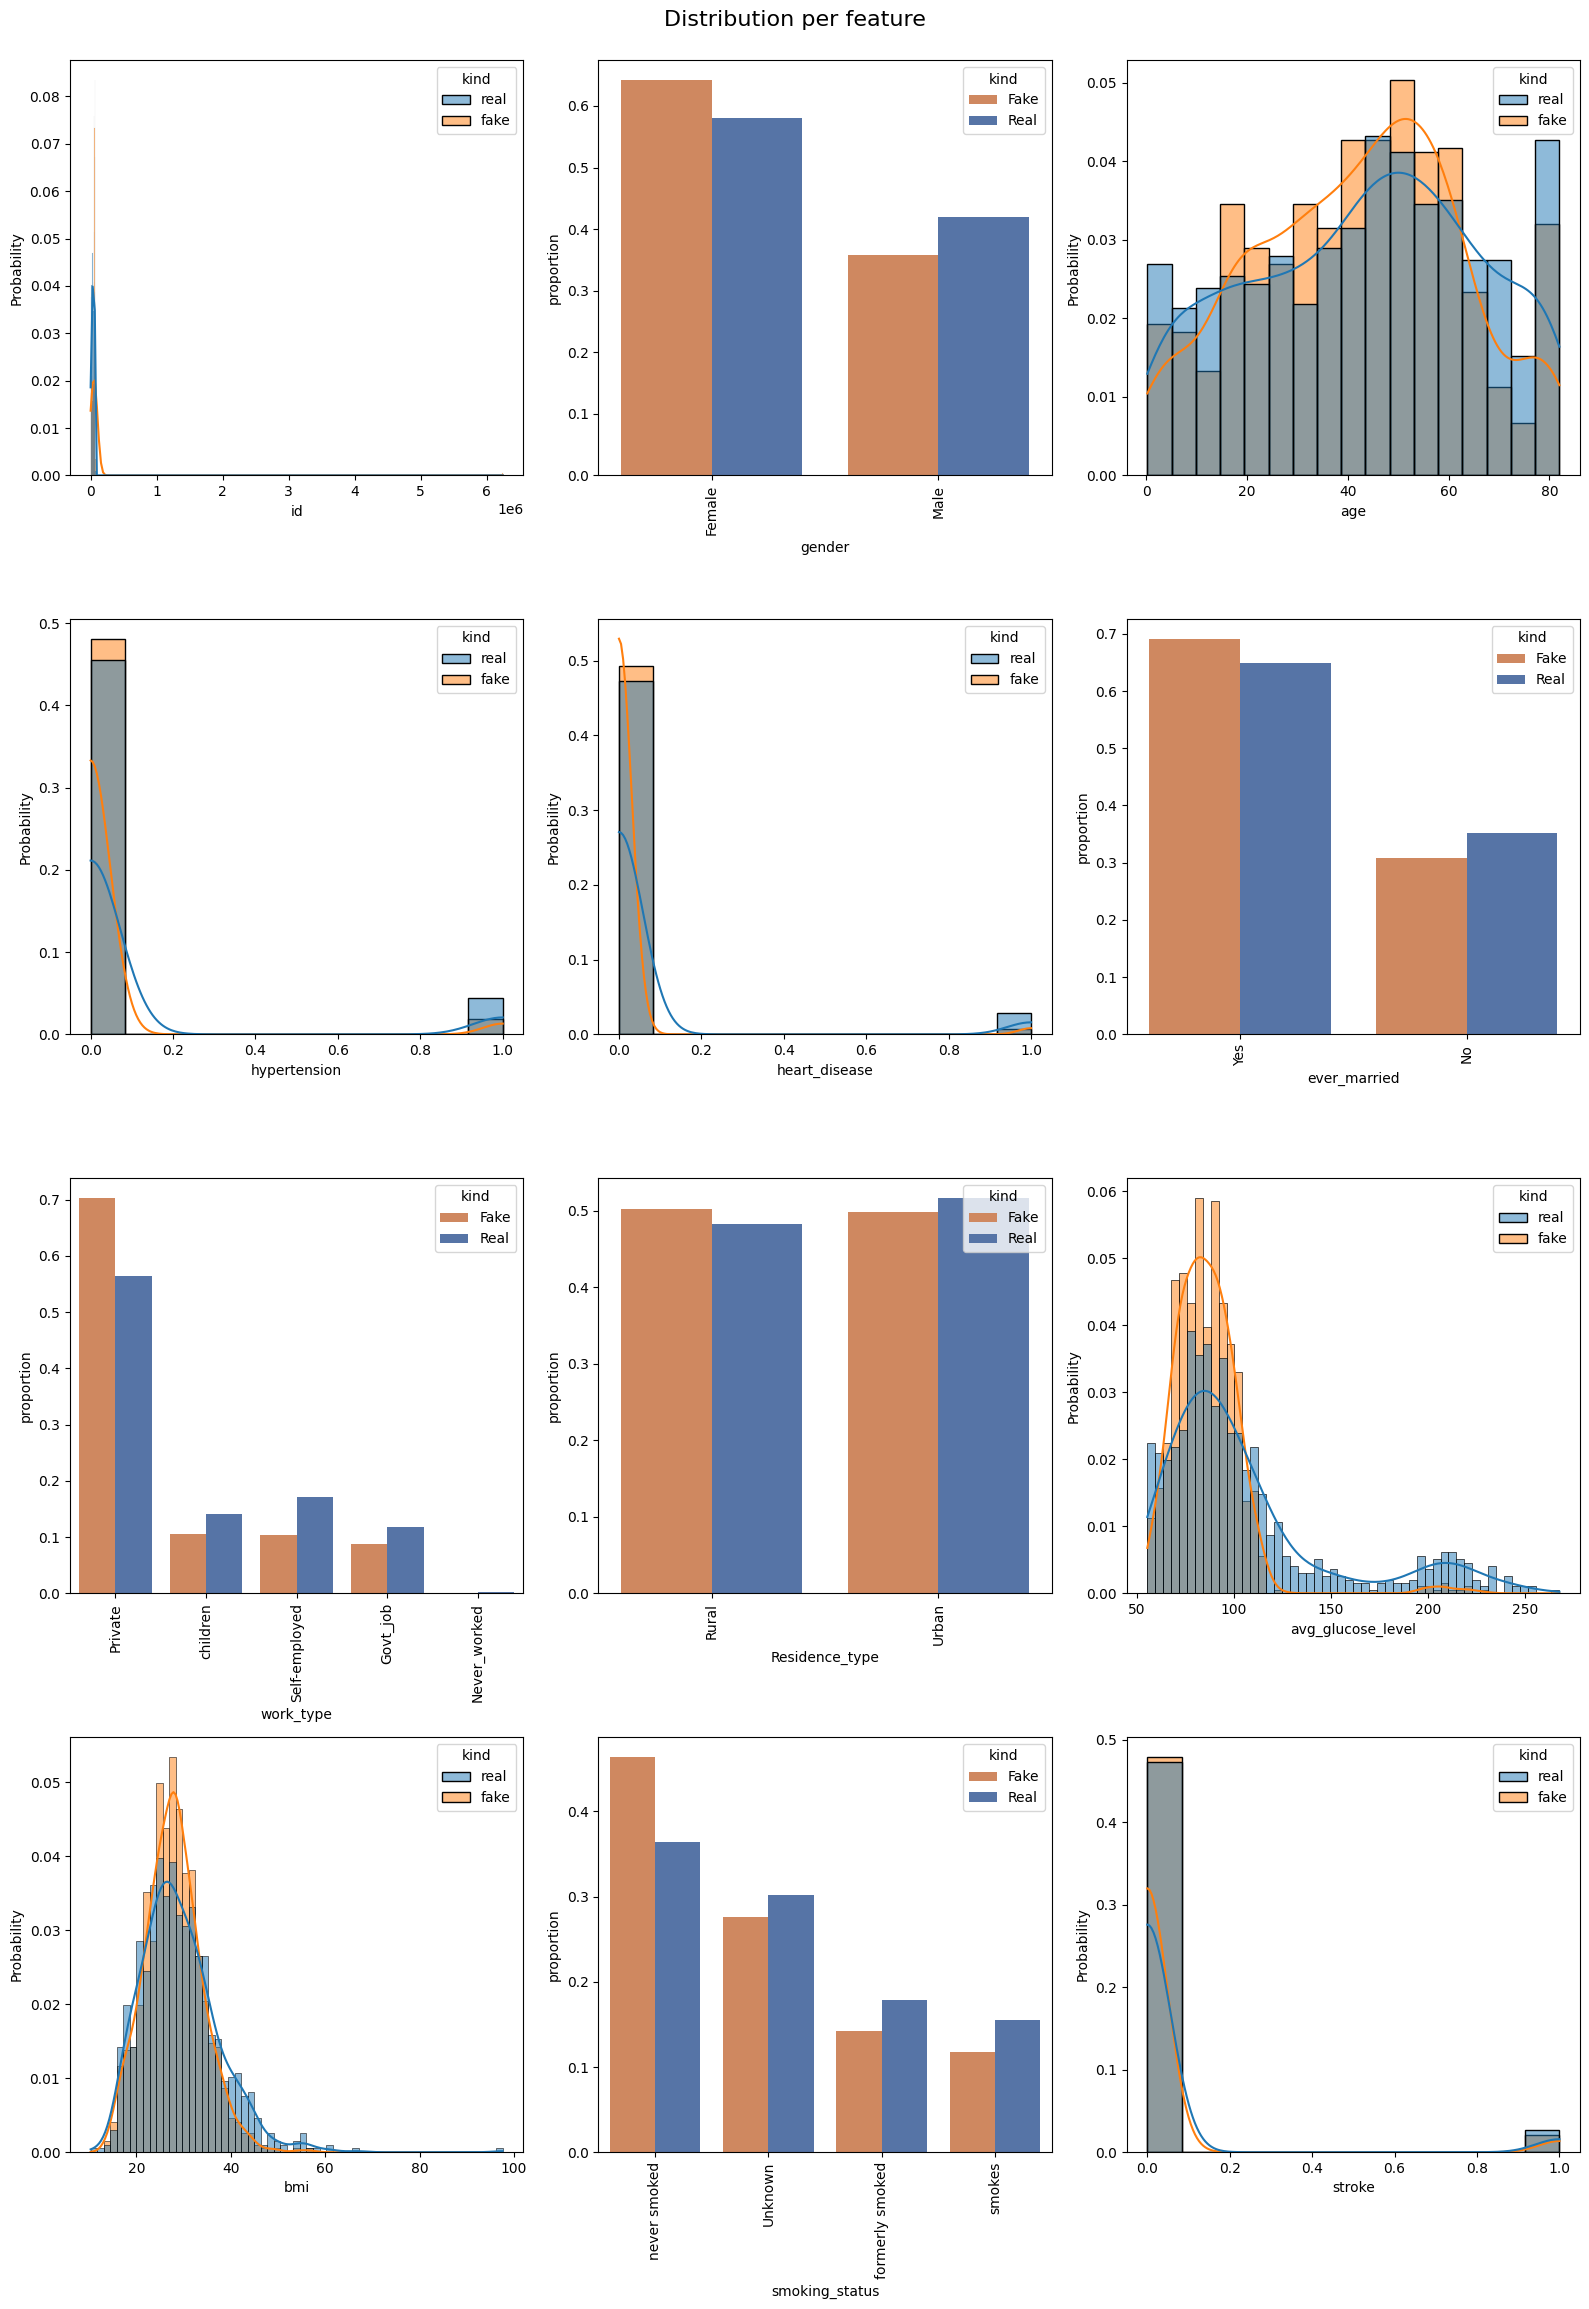

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/li

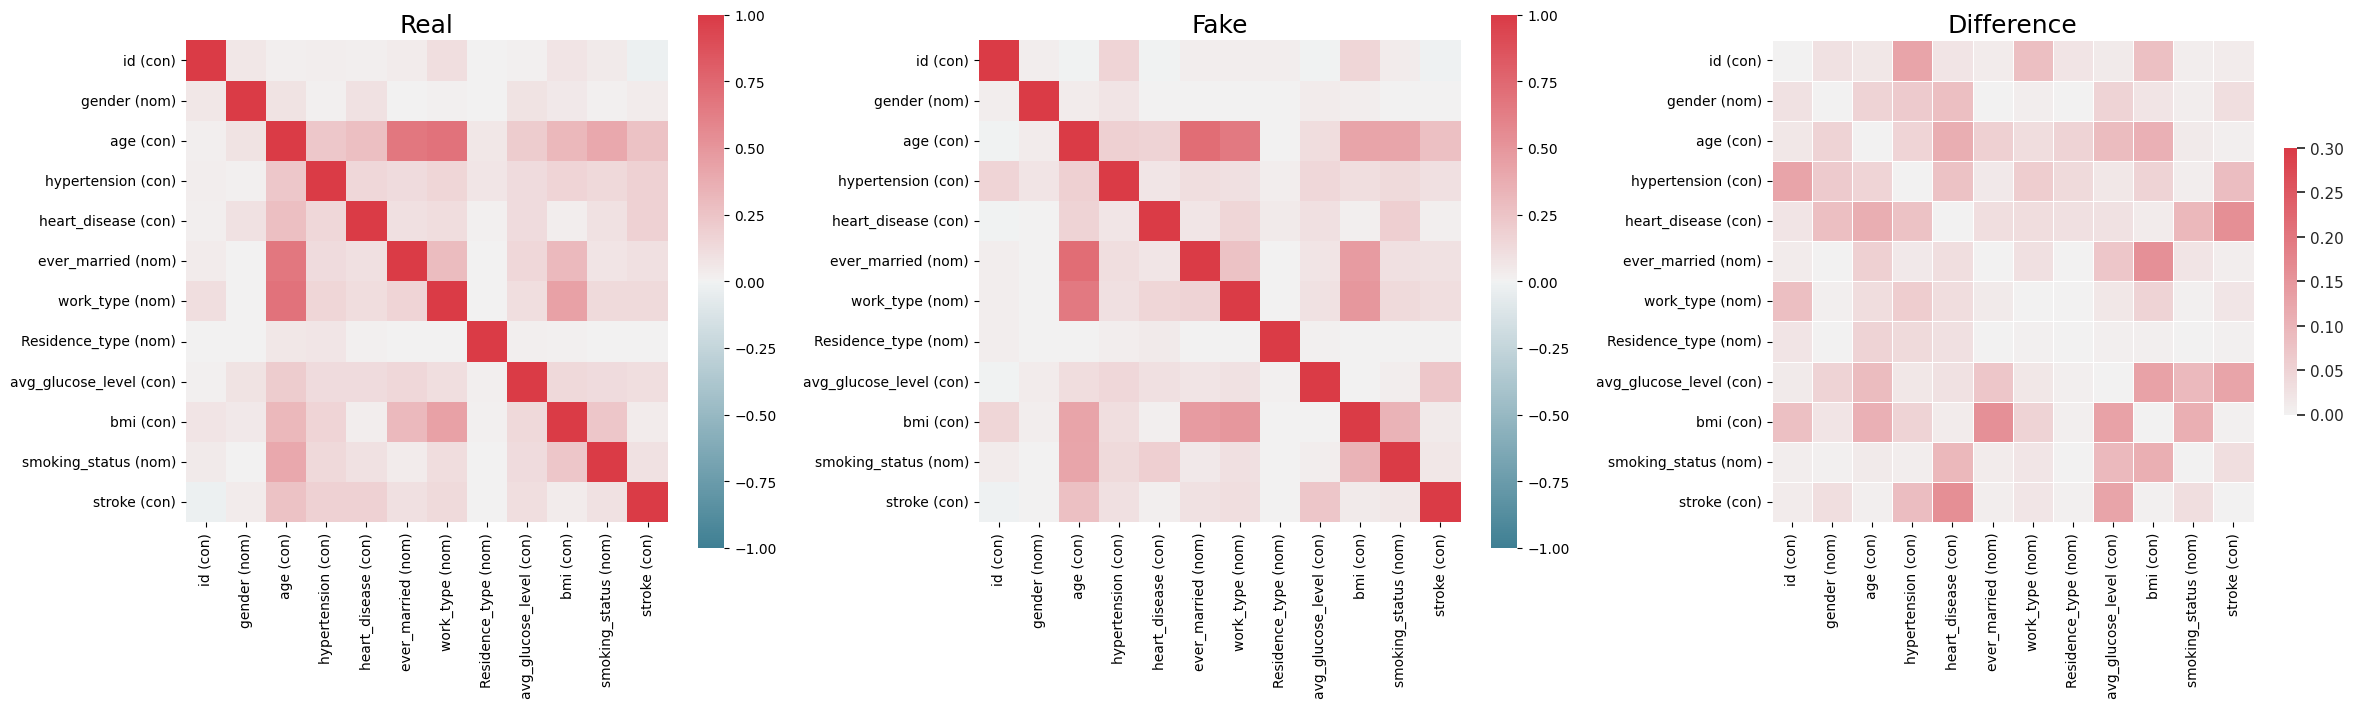

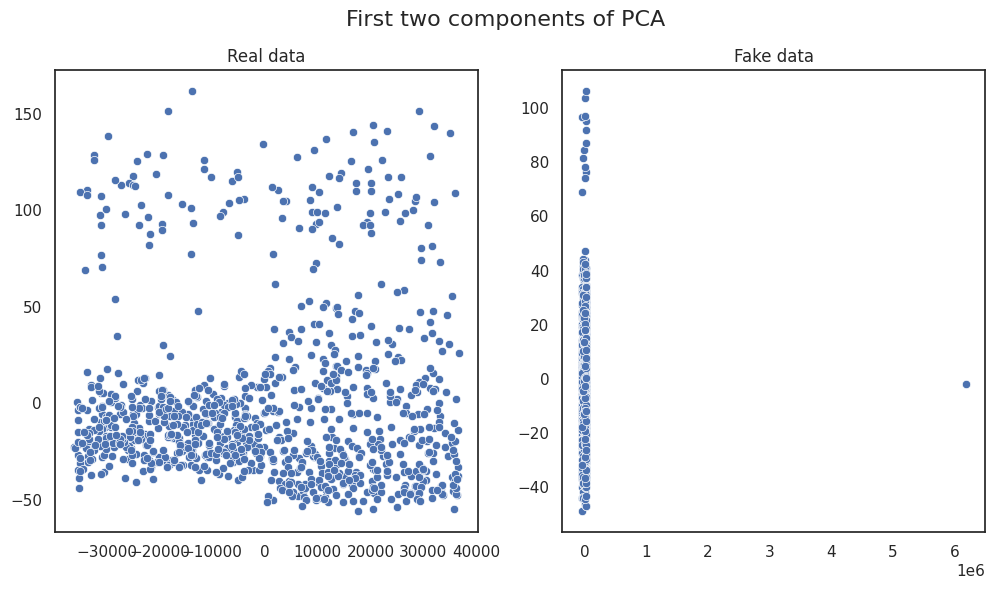

In [28]:
from table_evaluator import TableEvaluator
print(X_test.shape,synthetic_data.shape)
table_evaluator = TableEvaluator(X_test,synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='smoking_status')

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast 


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3909   0.4213              0.2351
DecisionTreeClassifier_real   0.3604   0.3909              0.2086
LogisticRegression_fake       0.5178   0.5279              0.8498
LogisticRegression_real       0.4518   0.4569              0.7511
MLPClassifier_fake            0.2335   0.2690              0.8942
MLPClassifier_real            0.2843   0.2944              0.7056
RandomForestClassifier_fake   0.4721   0.4924              0.2918
RandomForestClassifier_real   0.4467   0.4264              0.2961

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.1407
nearest neighbor std                     0.5401

Miscellaneous results:
                                  Result
Column Cor